In [1]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
import numpy as np
%matplotlib widget

Comparison of General Spectral Form

In [2]:
input_dir = 'cleaned_csvs'
csv_paths = glob.glob(f'{input_dir}/*_scans.csv')
scan_16, scan_24, scan_32, scan_48, scan_64, scan_72 = [pd.read_csv(path).drop(columns=['wave_no']) for path in csv_paths]
wave_no = pd.read_csv(f'{input_dir}/wave_no.csv')

for df in [scan_16, scan_24, scan_32, scan_48, scan_64, scan_72]:
    df['average'] = df.iloc[:,:].mean(axis=1)

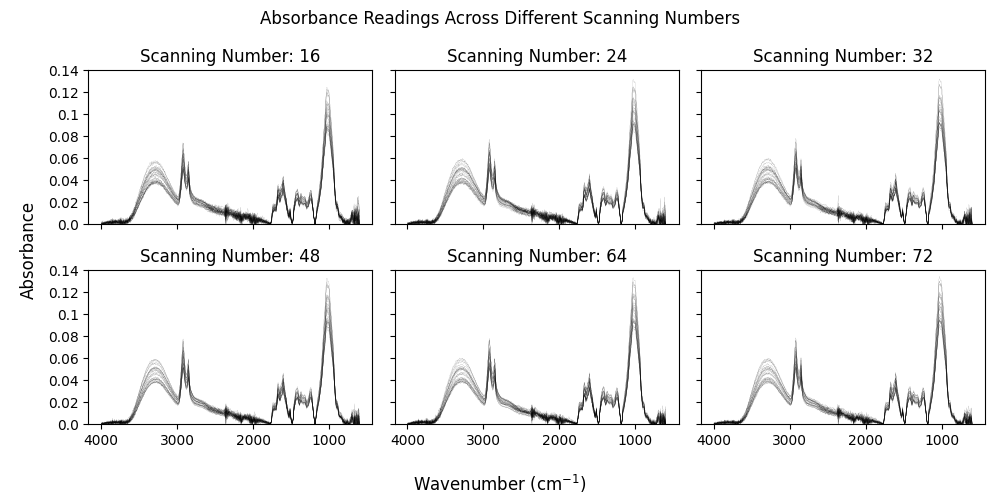

In [ ]:
#Plotting All Scanning Numbers Spectra
plt.close('all')
#fig init
master_fig, axes = plt.subplots(2,3, figsize=[10,5], sharex='all',sharey='all')
axes[0,0].invert_xaxis() #inverts x axis of upper right subplot which in turn inverts that of all subplots as sharex=true

master_fig.canvas.header_visible = False
master_fig.suptitle('Absorbance Readings Across Different Scanning Numbers')
master_fig.supxlabel('Wavenumber (cm$^{-1}$)')
master_fig.supylabel('Absorbance')

#organizing data

wave_no_x = wave_no
pooled_df = [scan_16, scan_24, scan_32,
             scan_48, scan_64, scan_72]
sn = [16,24,32,48,64,72]

for index, (axis, df) in enumerate(zip(axes.flat, pooled_df)):
    for sample in df.columns:
        axis.plot(wave_no_x, df[sample],
                  color='black',
                  linewidth=0.05)
    axis.set(title=f'Scanning Number: {sn[index]}',
             yticks=[tick for tick in np.arange(0, 0.160, 0.020)],
             yticklabels=[tick for tick in np.arange(0, 0.160, 0.020)],
             ylim=[0,0.140])


master_fig.tight_layout()

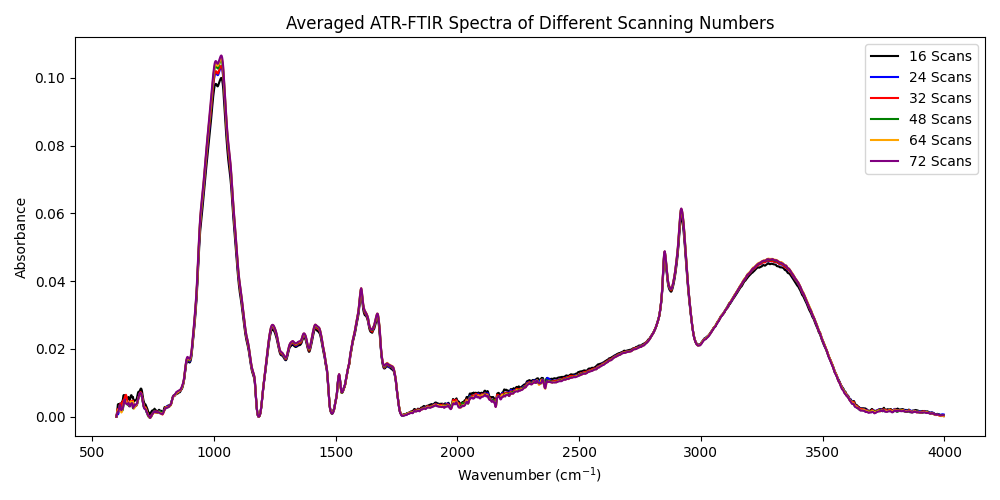

In [14]:
ave_master_fig, axis = plt.subplots(1,1, figsize=(10,5))
ave_master_fig.canvas.header_visible = False

pooled_df = [scan_16, scan_24, scan_32,
             scan_48, scan_64, scan_72]
sn = [16,24,32,48,64,72]
colors = ['black', 'blue', 'red', 'green',
          'orange', 'purple', 'brown']

for n, color, df in zip(sn, colors, pooled_df):
    axis.plot(wave_no, df['average'], color=color, label=f'{n} Scans', )

axis.set(title='Averaged ATR-FTIR Spectra of Different Scanning Numbers',
         ylabel='Absorbance',
         xlabel='Wavenumber (cm$^{-1}$)')

axis.legend()
ave_master_fig.tight_layout()

MDI & SMDI Analysis

In [4]:
master_smdi = pd.read_csv('smdi_results/master_smdi.csv')
master_mdi = pd.read_csv('mdi_results/master_mdi.csv')

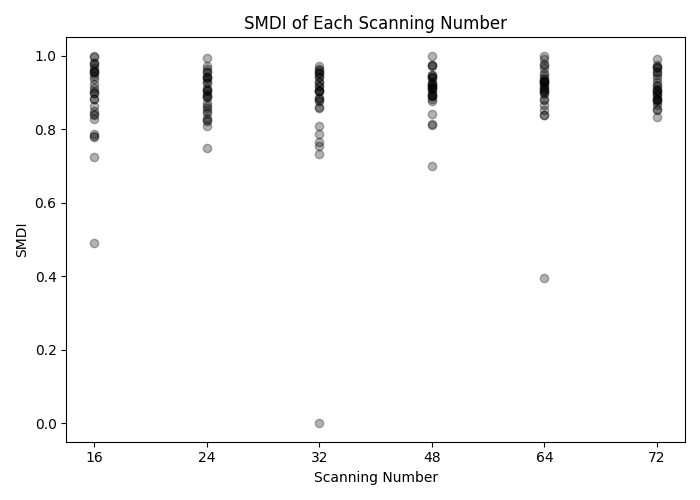

In [7]:
plt.close('all')

smdi_scatter, axis = plt.subplots(1,1, figsize=(7,5))
smdi_scatter.canvas.header_visible = False

xtl = [16, 24, 32, 48, 64, 72]
xt = [i for i in range(len(xtl))]

for tick, col in zip(xt, master_smdi.columns):
    y = master_smdi[col]
    axis.scatter([tick]*len(y), y,
                 alpha=0.3,
                 color='black')

axis.set(title='SMDI of Each Scanning Number',
         xlabel='Scanning Number',
         ylabel='SMDI',
         xticks=xt,
         xticklabels=xtl)

smdi_scatter.tight_layout()

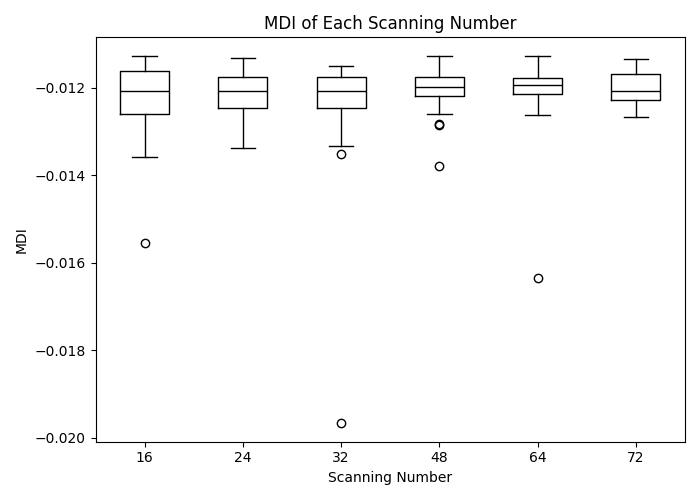

In [8]:
plt.close('all')
mdi_box, axis = plt.subplots(1,1, figsize=(7,5))
mdi_box.canvas.header_visible = False

pooled_mdi_data = [master_mdi[col].dropna() for col in master_mdi.columns]
axis.boxplot(x=pooled_mdi_data,
             medianprops={'color':'black'})
axis.set(title='MDI of Each Scanning Number',
         xlabel='Scanning Number',
         ylabel='MDI',
         xticklabels=[16,24,32,48,64,72])


mdi_box.tight_layout()